# EE 519 — Speech AI
## HW-1 | Notebook 1: Recording, Sampling & Quantization

**Student Name:**  
**USC ID:**  
**Date:**  

---

### Learning Objectives
By completing this notebook, you will:
- Understand the transition from continuous speech to digital signals
- Explore the effects of sampling rate and quantization
- Connect visual distortions to perceptual changes
- Develop intuition for minimum requirements in speech processing

> ⚠️ **Important**
> - All answers (code + explanations) must be written **inside this notebook**
> - Do **not** delete questions or prompts
> - Clearly label all plots (title, axes, units)
> - Audio must be playable inline


### Grading (Notebook 1 — 20 points)

| Component | Points |
|---|---:|
| Correct signal recording & handling | 4 |
| Sampling experiments & plots | 5 |
| Quantization experiments & plots | 5 |
| Observations & explanations | 4 |
| Clarity & organization | 2 |

> We grade **understanding and reasoning**, not perfection.


---

# 0. Setup

This notebook is designed to work with **your own recordings**. You will record:
1. A sustained vowel (≈3 seconds), e.g., `/a/`, `/i/`, or `/u/`
2. A spoken sentence (≈3–6 seconds), e.g., **“I am taking a speech AI course.”**

## File requirements
- WAV format recommended
- Mono (one channel) preferred
- Keep filenames simple (no spaces), e.g.:
  - `vowel.wav`
  - `sentence.wav`

Place your files in the same folder as this notebook, or update the path variables below.


In [153]:
# TODO: Load required libraries
# Recommended: numpy, scipy, matplotlib
# Optional (helpful): soundfile, librosa, IPython.display

import numpy as np
import matplotlib.pyplot as plt

# If you want inline audio playback:
from IPython.display import Audio, display


In [154]:
# TODO: Set paths to your recordings
VOWEL_PATH = "vowel.wav"
SENTENCE_PATH = "sentence.wav"


In [155]:
import sounddevice as sd
import soundfile as sf
""" fs = 16000
duration = 3
print("recording vowel: A sustained vowel `/a/`")
vowel_audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()
print("saving vowel")
sf.write(VOWEL_PATH, vowel_audio, fs) """



' fs = 16000\nduration = 3\nprint("recording vowel: A sustained vowel `/a/`")\nvowel_audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)\nsd.wait()\nprint("saving vowel")\nsf.write(VOWEL_PATH, vowel_audio, fs) '

In [156]:
""" print("recording sentence: A spoken sentence: I am taking a speech AI course.")
sentence_audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()
print("saving sentence")
sf.write(SENTENCE_PATH, sentence_audio, fs)
print("recordings saved") """

' print("recording sentence: A spoken sentence: I am taking a speech AI course.")\nsentence_audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)\nsd.wait()\nprint("saving sentence")\nsf.write(SENTENCE_PATH, sentence_audio, fs)\nprint("recordings saved") '

In [157]:
# TODO: Write a robust WAV loader.
# Requirements:
# - Return signal as float32 in [-1, 1]
# - Return sample rate fs
# - If stereo, convert to mono (e.g., average channels)

# Hints:
# - You can use scipy.io.wavfile.read OR soundfile.read
# - Be careful with integer PCM formats (int16/int32)


def load_wav(path):
    """Return signal, fs."""
    x, fs = sf.read(path, dtype="float32", always_2d=True)
    if x.shape[1] > 1:
        x = np.mean(x, axis=1)
    else:
        x = x[:,0]
    x = np.clip(x, -1, 1)
    return x, fs



In [158]:
# TODO: Load your recordings
# 1) vowel signal
# 2) sentence signal

x_vowel, fs_vowel = load_wav(VOWEL_PATH)
x_sentence, fs_sentence = load_wav(SENTENCE_PATH)
print("Sampling rate (vowel):", fs_vowel)
print("Sampling rate (sentence):", fs_sentence)

print("Vowel duration (seconds):", len(x_vowel) / fs_vowel)
print("Sentence duration (seconds):", len(x_sentence) / fs_sentence)

print("Vowel min amplitude:", np.min(x_vowel))
print("Vowel max amplitude:", np.max(x_vowel))
# Print:
# - sampling rate
# - duration (seconds)
# - min/max amplitude


Sampling rate (vowel): 16000
Sampling rate (sentence): 16000
Vowel duration (seconds): 3.0
Sentence duration (seconds): 3.0
Vowel min amplitude: -0.04309082
Vowel max amplitude: 0.035461426


---

# 1. Recording Quality: Visualization & Playback

### Task
For each signal (vowel + sentence):
1. Plot the **full waveform**
2. Plot a **zoomed-in** segment (50–100 ms)
3. Play the audio inline and confirm:
   - No audible clipping
   - Reasonable loudness
   - Signal is not truncated

### Notes
- Use consistent labeling: time in seconds on x-axis, amplitude on y-axis.
- For zoomed segment, pick a region that is not silence.


In [159]:
# TODO: Implement helper plotting utilities
# Example suggestions:
# - plot_waveform(x, fs, title, tlim=None) where tlim is (t_start, t_end) in seconds
# - select_zoom_region(x, fs, start_sec, duration_ms)

def plot_waveform(x, fs, title, tlim=None):
    t = np.arange(len(x)) / fs
    plt.figure()
    plt.plot(t, x)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()
def play_audio(x, fs):
    # This is optional but recommended
    display(Audio(x, rate=fs))


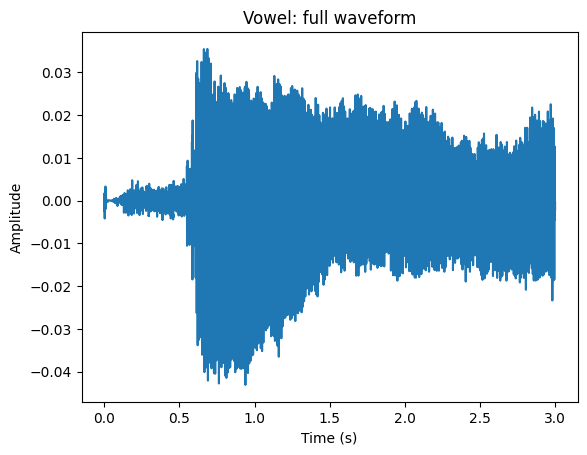

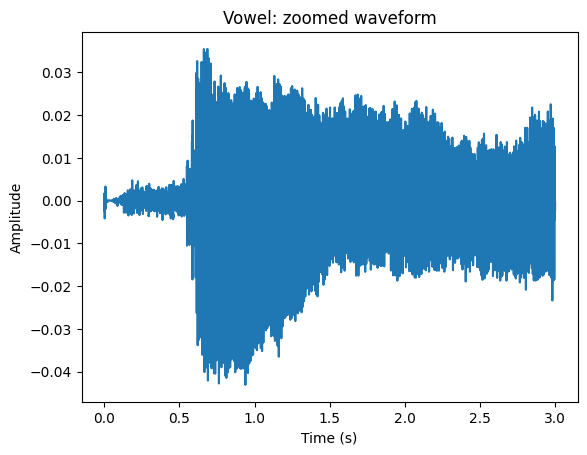

In [160]:
# TODO: Plot and play vowel
plot_waveform(x_vowel, fs_vowel, "Vowel: full waveform")
plot_waveform(x_vowel, fs_vowel, "Vowel: zoomed waveform", tlim=(..., ...))
play_audio(x_vowel, fs_vowel)


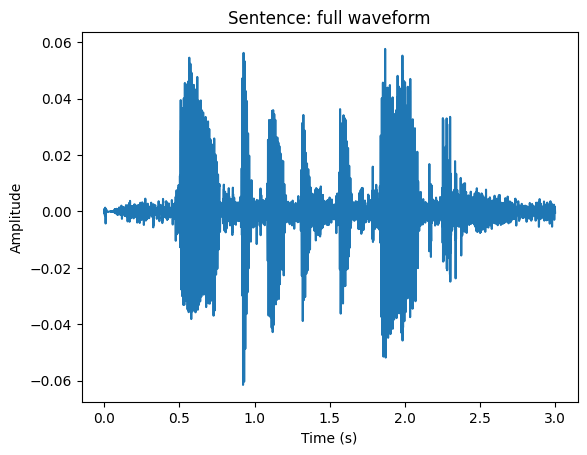

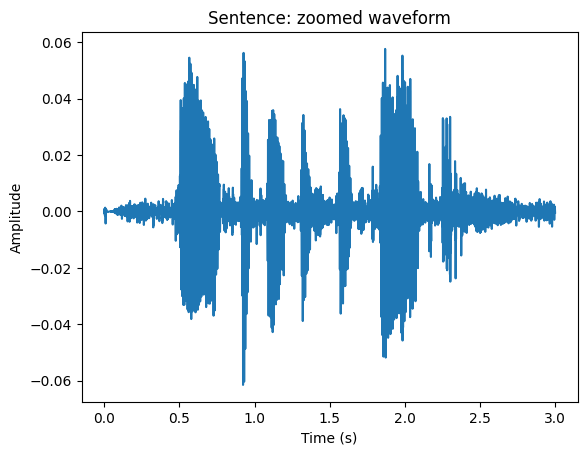

In [161]:
# TODO: Plot and play sentence
plot_waveform(x_sentence, fs_sentence, "Sentence: full waveform")
plot_waveform(x_sentence, fs_sentence, "Sentence: zoomed waveform", tlim=(..., ...))
play_audio(x_sentence, fs_sentence)


### Observations (Recording Quality)

Answer briefly (3–6 bullets total):

- Is the waveform symmetric around 0? What might cause asymmetry?

    Yes it is symmetric. I think that certain sounds can lead to asymmetry
- Are there visible silent regions? Where?

    Yes in the beginning and the end of the words
- Do you see any evidence of clipping (flat tops / bottoms)?

    No I do not see any evidence of clipping.
- Compare vowel vs sentence: what differences do you observe in amplitude dynamics?

    I see a better frequence compared to the vowel. The sentence seems to have more noticable frequency. 

---

# 2. Sampling Rate Experiments (Perceptual + Visual)

You will analyze how **sampling frequency** affects speech. Create resampled versions of **one** chosen signal first (recommended: the sentence), then optionally repeat for the vowel.

### Required target sampling rates
- Original sampling rate (reference)
- 16 kHz
- 8 kHz
- 4 kHz

> Use **proper resampling** (anti-aliasing filter + resample), not naive decimation.


In [162]:
# TODO: Choose which signal to use for sampling experiments
# Suggested: sentence
x_ref = x_sentence   # e.g., x_sentence
fs_ref = fs_sentence  # e.g., fs_sentence


In [163]:
# TODO: Implement resampling utility
# Requirements:
# - Accept x, fs_in, fs_out
# - Return x_out (float in [-1, 1]) and fs_out


from scipy.io import wavfile
from scipy.signal import resample_poly
def resample_signal(x, fs_in, fs_out):
    if fs_in == fs_out:
        return x, fs_out
    else:
        x_out = resample_poly(x, fs_out, fs_in)
        return x_out, fs_out

In [164]:
# TODO: Create resampled versions at 16k, 8k, 4k
# Store them in a dictionary for convenience.

target_fs_list = [16000, 8000, 4000]
signals = {}  # e.g., {"orig": (x_ref, fs_ref), "16k": (...), ...}


signals["orig"] = (x_ref, fs_ref)
for fs_tgt in target_fs_list:
     x_tgt = resample_signal(x_ref, fs_ref, fs_tgt)
     signals[f"{fs_tgt//1000}k"] = (x_tgt)
     


## 2.1 Time-domain comparison

For each sampling rate:
- Plot the **same time segment** (same start time and duration in seconds)
- Use the **same y-limits** across plots if possible (helps comparison)


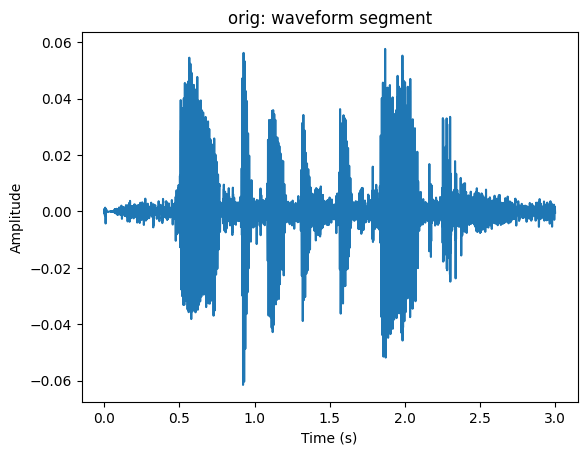

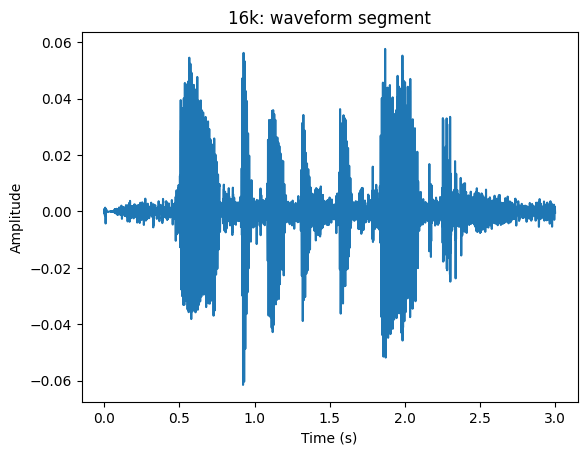

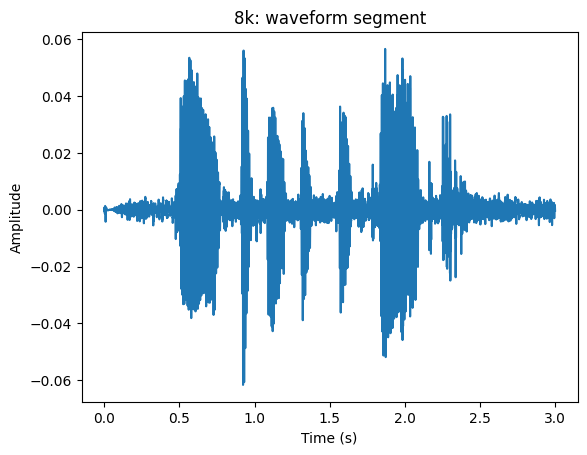

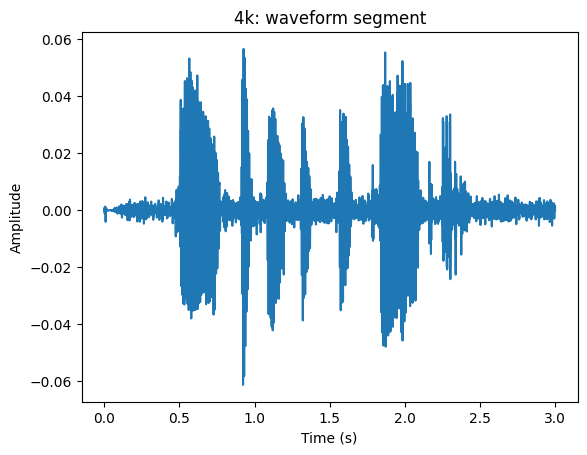

In [165]:
# TODO: Plot the same segment for each sampling rate
# Choose a segment with speech activity (not silence).
# Example:
segment_start = 0  # seconds
segment_dur = 3    # seconds
for key, (x, fs) in signals.items():
    plot_waveform(x, fs, f"{key}: waveform segment", tlim=(segment_start, segment_start + segment_dur))


## 2.2 Frequency-domain comparison

For each sampling rate:
- Compute magnitude spectrum (FFT) for the **same segment length in seconds**
- Plot magnitude vs frequency (Hz)
- Use consistent plotting choices so the comparison is meaningful

### Hint (recommended approach)
- Apply a window (e.g., Hann) before FFT
- Plot only up to Nyquist (fs/2)


In [166]:
# TODO: Implement FFT magnitude spectrum helper
from scipy.signal import get_window
from scipy.fft import rfft, rfftfreq

def magnitude_spectrum(x, fs):
    
    ### First step is to extract a segment of the signal from X for analysis 
    start_sec = 0 
    duraction_sec = 3
    io = int(start_sec * fs)
    N = int(duraction_sec * fs)
    segment = x[io:io+N]
    
    ### Second step is to apply a window befor FFT to reduce spectral leakage. I choose Hanning window here.
    window = get_window("hann", N)
    segment_windowed = segment * window
    
    ### Third step is to compute the magnitude spectrum ussing FFT.
    X = rfft(segment_windowed)
    magnitude = np.abs(X)
    
    ### fourth is to compute the corresponding frequency axis 
    freqs = rfftfreq(N, 1/fs)

    """Return frequency axis (Hz) and magnitude spectrum (linear or dB)."""
    return freqs, magnitude


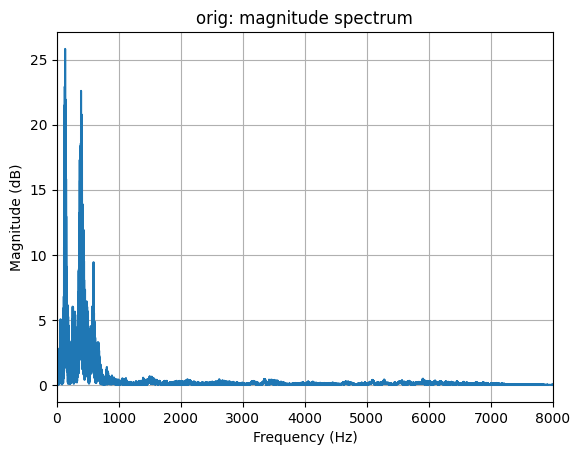

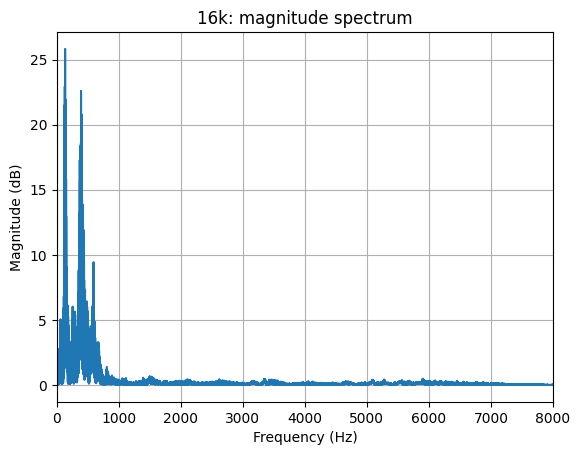

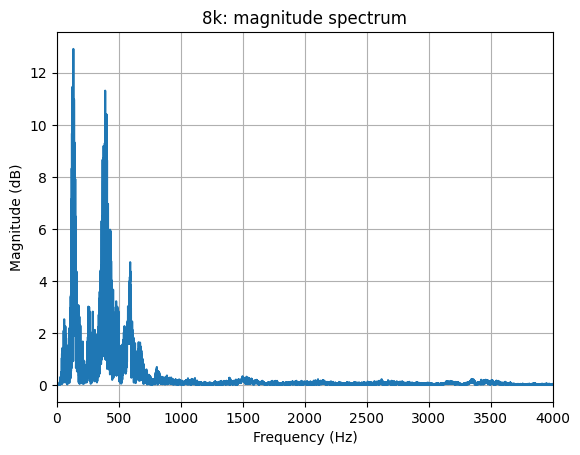

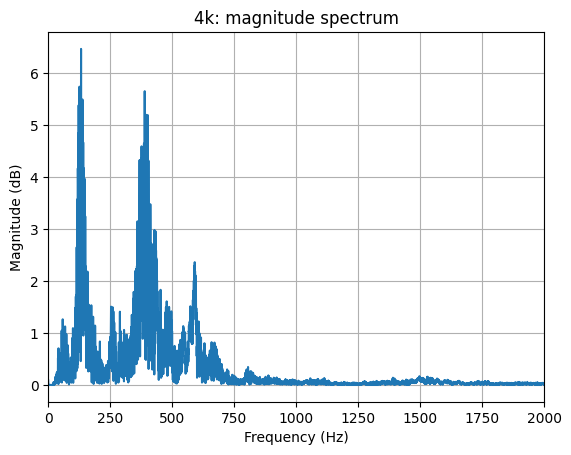

In [167]:
# TODO: Plot spectra for each sampling rate
for key, (x, fs) in signals.items():
     f, mag = magnitude_spectrum(x, fs)
     plt.figure()
     plt.plot(f, mag)
     plt.title(f"{key}: magnitude spectrum")
     plt.xlabel("Frequency (Hz)")
     plt.ylabel("Magnitude (dB)" or "Magnitude")
     plt.xlim(0, fs/2)
     plt.grid(True)
     plt.show()


### Observations (Sampling)

Answer in 6–10 lines total:

- At what sampling rate does intelligibility begin to degrade (for your chosen signal)?
- Where do you visually observe aliasing (if at all)? What plot made it obvious?
- Does aliasing appear before or after speech becomes unintelligible?
- Does the vowel degrade differently than the sentence? Why might that be?


Student Answer:
- The lower the sampling rate the more the intelligibility begins to degrade. It is visible from my signal between 8kHz and 4kHz
- I see aliasing mostly at the 4kHz graph. It is more apparent. 
- It appears before the audio becomes intelligible.
- The sentence degrades more. It has more friction between consonants. 



### Conceptual Reasoning (Sampling)

Answer clearly in complete sentences:

1. What is the **minimum sampling rate** you would recommend for intelligible speech?  
2. Does the Nyquist criterion alone guarantee **perceptual** quality? Explain.  
3. Why does speech remain intelligible even when high frequencies are lost? (Connect to speech cues.)


Student answer: 
1. I would say to stay above 8 kHz would be enough. Anything below might make speech non intelligible.
2. No, the Nyquist criterion alone does not guarentee peceptual quality. Sampling is important and if your rate is too low then you can skip out on high frequency sounds.
3. Most speech is at a lower to medium frequency. This is like having most big pieces of the puzzle but missing smaller details, most is there which means it remain intelligible. 


---

# 3. Quantization Experiments

You will study **bit depth** and its perceptual impact.

### Task
Quantize the *same reference signal* to:
- 16-bit (reference)
- 8-bit
- 4-bit
- 2-bit

> Implement **uniform quantization** yourself (do not call a pre-made quantizer).


In [168]:
# TODO: Implement uniform quantization
# Requirements:
# - Input: x in [-1, 1]
# - Parameter: n_bits (e.g., 16, 8, 4, 2)
# - Output: quantized signal x_q in [-1, 1]
# - Also return quantization step size Δ (optional but recommended)

def uniform_quantize(x, n_bits):
    # x is in [-1, 1]
    levels = 2 ** n_bits
    delta = 2 / levels
    x_q = np.round((x + 1) / delta)
    x_q = np.clip(x_q, 0, levels - 1)
    
    return x_q

In [169]:
# TODO: Generate quantized versions
q_versions = {}
for n_bits in [16, 8, 4, 2]:
    x_q = uniform_quantize(x_ref, n_bits)
    q_versions[f"{n_bits}bit"] = x_q


## 3.1 Quantized waveforms (zoom)

- Plot original vs quantized for a **50–100 ms** segment
- Overlay plots or show separate plots (your choice)
- Label clearly with bit depth


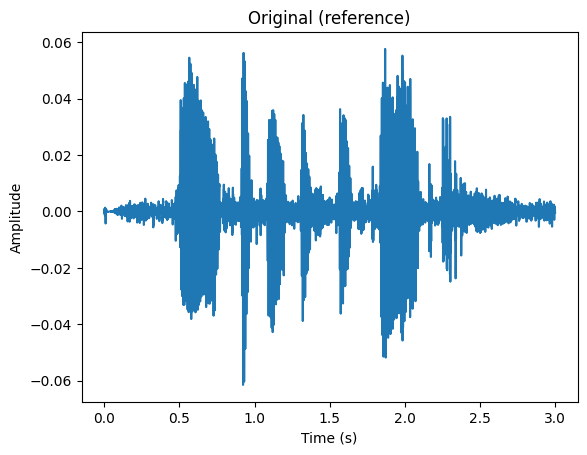

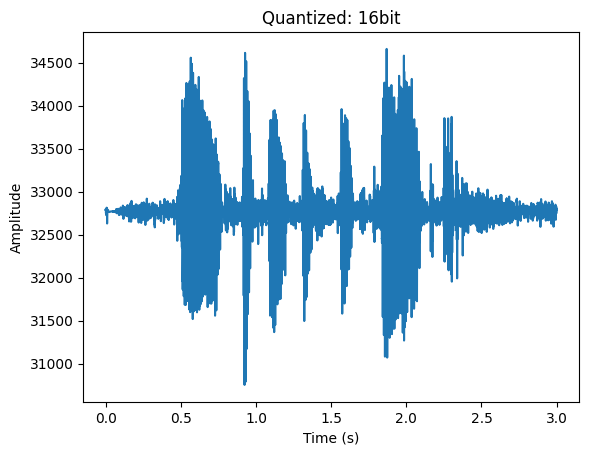

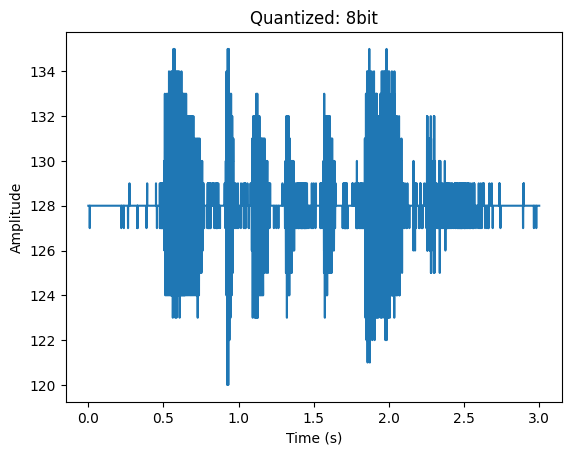

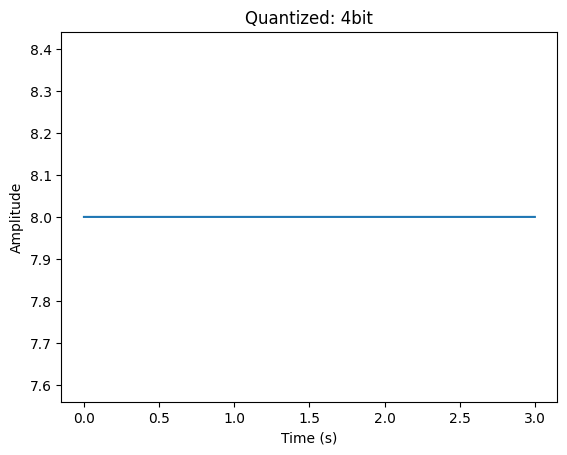

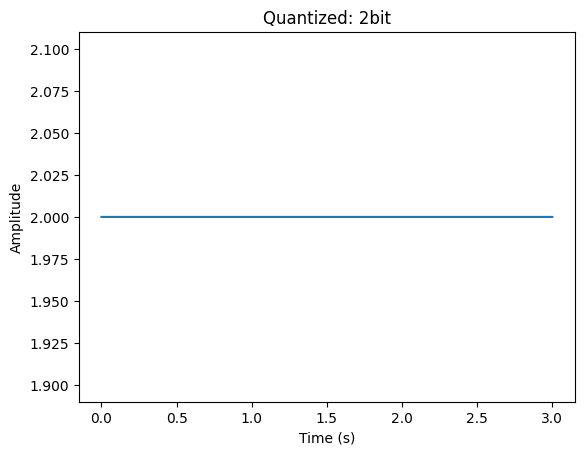

In [178]:
# TODO: Plot original vs quantized signals (zoomed)
tlim = ( 50, 100 )
plot_waveform(x_ref, fs_ref, "Original (reference)", tlim=tlim)
for key, x_q in q_versions.items():
   plot_waveform(x_q, fs_ref, f"Quantized: {key}", tlim=tlim)


## 3.2 Quantization error

Compute and visualize quantization error:
- error = original - quantized
- Plot error for a short segment
- (Optional) plot histogram of error values


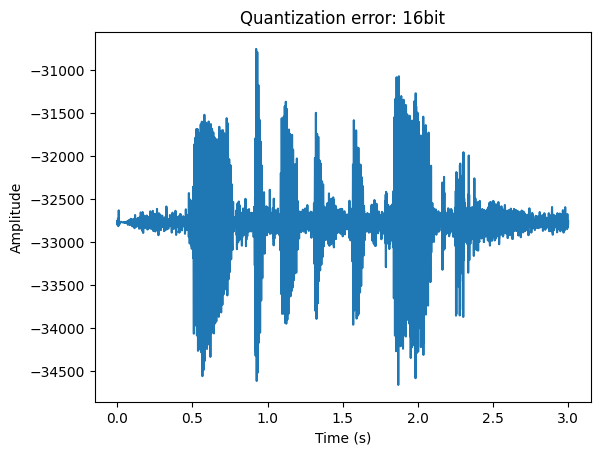

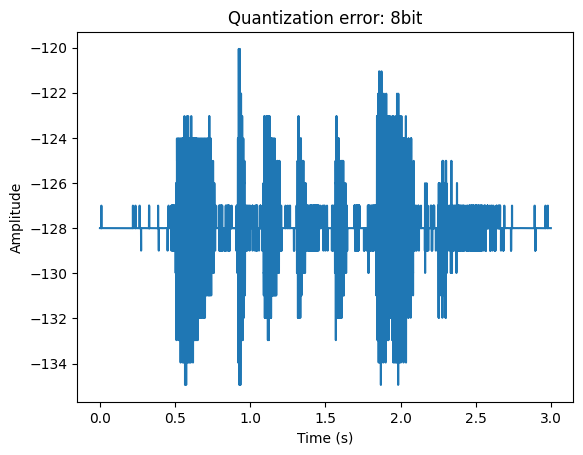

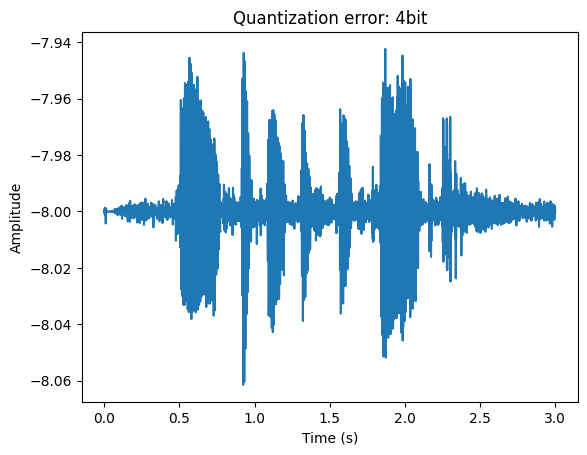

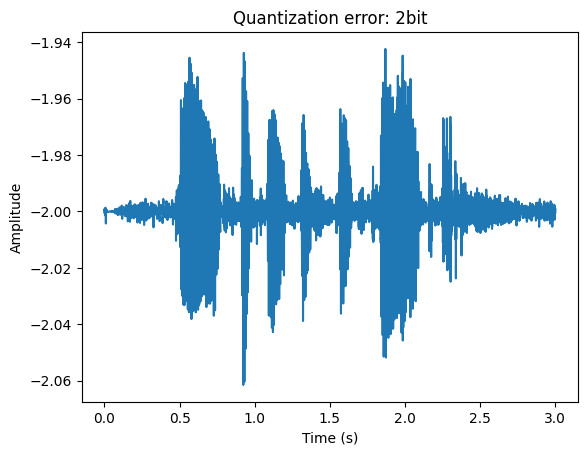

In [171]:
# TODO: Compute and plot quantization error
for key, x_q in q_versions.items():
    err = x_ref - x_q
    plot_waveform(err, fs_ref, f"Quantization error: {key}", tlim=tlim)


## 3.3 Listening test

For each quantized version:
- Play audio inline
- Write 1–2 lines describing what you hear

> Tip: Use headphones for low-bit-depth signals.


In [172]:
# TODO: Play quantized audio versions
for key, x_q in q_versions.items():
    print(key)
    play_audio(x_q, fs_ref)


16bit


8bit


4bit


2bit


### Observations (Quantization)

Answer in 6–10 lines total:

- Which bit depth introduces clearly audible distortion first?
- Is distortion more noticeable in vowels or fricatives? Why?
- Does increasing sampling rate reduce quantization artifacts? Why or why not?


Student Answer: 

- The bit depth of 8 bits introduces clearly audible distortion first. I was able to tell what was being said up until 8 bit after that it was very difficul to hear if not impossible. 
- I would say there are more noticeable in vowels. I would say the prolonged sounds are more difficult to understand. 
- No it does not. The reason why is because increasing sampling rate does nothing for the bit size. The data is being limited by resolution amplitude. 

### Conceptual Reasoning (Quantization)

Answer clearly:

1. Why does quantization noise sound different from additive white noise?  
2. Why is speech surprisingly robust to low bit depth (to a point)?  
3. How is quantization related to dynamic range and SNR?


Student Answer: 

- Quantizization noise sounds different from additive white noise because the additive white noise is more smooth while the quantization noise is correlated with the wave form. 
- There are many things that contribute to speech. It is not a single sound that makes something audible. There are plenty of patterns that help make the skeleton of the sound and make it recognizble even if finer detail is not there. 
- Quantization is related to dynamic range as the more in depth a sound is the better the dynamic range and more detailed.It relates to SNR because it the higher the quantization the better the SNR. There is more signal and less noise/error.

---

# 4. Sampling vs Quantization — Combined Effects

Compare the following two degradation types:

1. **High sampling + low bit depth** (e.g., 16 kHz at 2-bit or 4-bit)  
2. **Low sampling + high bit depth** (e.g., 4 kHz at 16-bit)

### Task
Create two or more paired conditions and evaluate:
- Waveform (zoom)
- Spectrum
- Listening


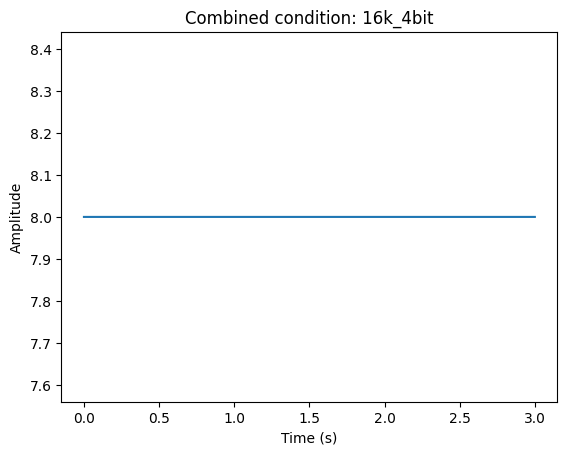

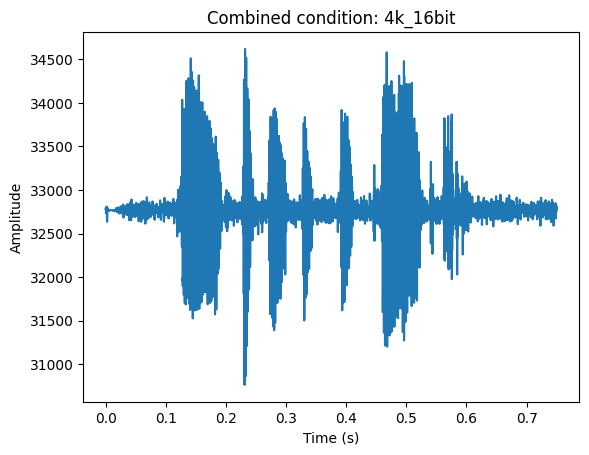

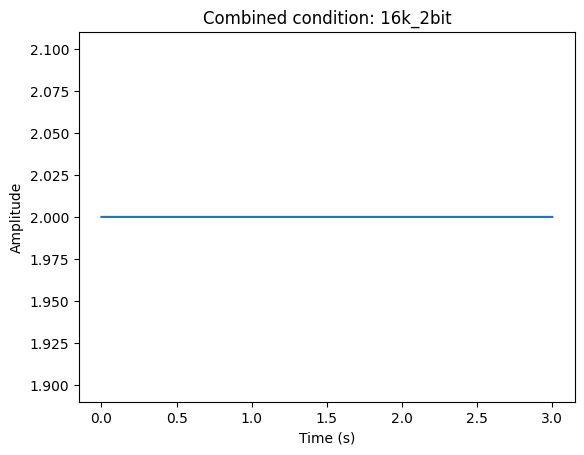

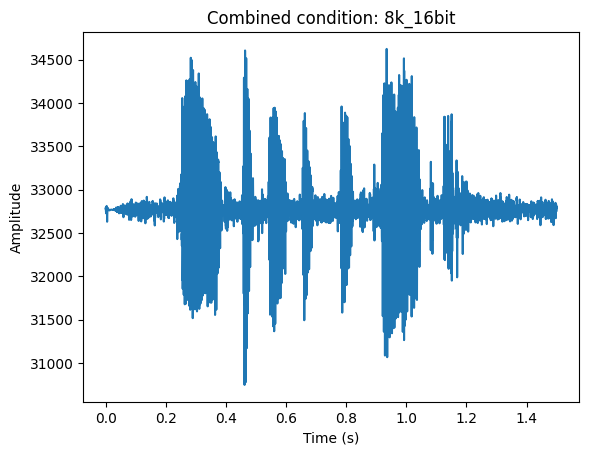

In [179]:
# TODO: Build combined conditions (choose at least two comparisons)
# Example conditions:
# - (16k, 4-bit) vs (4k, 16-bit)
# - (16k, 2-bit) vs (8k, 16-bit)
#
# You may need to:
# - resample first, then quantize (or vice versa)
# - be consistent and document your pipeline
x_ref, fs_ref = signals["orig"]
resampled_signals = {
    "16k": resample_signal(x_ref, fs_ref, 16000),

    "8k": resample_signal(x_ref, fs_ref, 8000),
    "4k": resample_signal(x_ref, fs_ref, 4000),
}
combined_conditions = {
    "16k_4bit": uniform_quantize(resampled_signals["16k"][0], 4),
    "4k_16bit": uniform_quantize(resampled_signals["4k"][0], 16),
    "16k_2bit": uniform_quantize(resampled_signals["16k"][0], 2),
    "8k_16bit": uniform_quantize(resampled_signals["8k"][0], 16),
}
for key, x_combined in combined_conditions.items():
    plot_waveform(x_combined, fs_ref, f"Combined condition: {key}", tlim=tlim)



### Observations (Combined Effects)

Answer in 6–10 lines total:

- Which degradation is more perceptually damaging for your signal?
- Under what conditions does quantization dominate?
- Under what conditions does sampling dominate?
- Give one example from your plots that supports your conclusion.


Student Answer: 
- The degradation that is more perceptually damaging for my signal is the bit depth. 
- Quantization dominates when the bit depth is low. For this example it was noticeable at 4bit and 2 bit. 
- Sampling dominates when it is at a lower sampling rate. 
- 16K 2 bit and 4 bit samples were just not comparable. It flatlined. which means we lost a lot of information. 

### Final Conceptual Insight (Combined)

Explain (8–12 lines):

Why do **sampling frequency** and **quantization resolution** affect *different perceptual dimensions* of speech?

Use your own experiment results as evidence (point to specific plots or conditions).


Student Answer:

Sampling frequency and quantization resolution are important but affect different parts of speech. Sampling frequency leaves gaps of information out, this is important because high frequency information is lost. The good thing is speech follows patters so even if we do miss information we can you surrounding context to make out what is missed. For quantization it is more like muzzling of voice. It is an even missing of information so on average we do not retain the same amount of information. This not bad at 16 to 8 bits but it becomes really hard to understand at 4 and 2 bit depth. This is because very little information is being stored even if it is at a high frequency. 


---

# 5. Reflection (Mandatory)

Write thoughtful answers. There are no “right” responses here—only honest reflection.

### Reflection prompts
1. **What did you learn** that you did not understand before doing the experiments?  
2. What was a **sudden surprise / unexpected result** you noticed (visual or perceptual)?  
3. What was one moment where you thought you understood something, but the plots/audio **challenged your intuition**?  
4. If you had to explain sampling vs quantization to a friend in **two sentences**, what would you say?  
5. What is one question you now have that you want to explore further?


Student Answer: 

1. I learned that both sampling frequency and bit depth are important for recording sound. Each one has its own unique problems. 
2. I did not expect for the bit depth at 2 and 4 to be so drastic. I thought maybe some information would have been more noticeable but that was not the case. 
3. the 16 hz and 2 bit made me really confused. I thought it would sound good but it did not.
4. I would say sampling frequency is how fast/slow you blink and bit depth is how much vision you have. Each one add to the picture but they do so in different ways. 
5. How does reconstructing audio work if we have a low frequency or low bit depth. 

---

# 6. AI Use Disclosure (Required)

If you used any AI tools (including ChatGPT), briefly describe:
- What you used it for (e.g., debugging, concept clarification)
- What you wrote/changed yourself

Example:
- “Used ChatGPT to understand how resampling works conceptually; wrote resampling code myself.”

*(If you did not use AI, write “No AI tools used.”)*


**Student Answer:**
I used it to help me understand topics while doing homework. Show me example code and architectural approaches.